In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/StressLevelDataset.csv")

In [ ]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# Descriptive Statistics

- 1) How many students are in the dataset?
- 2) What is the average anxiety level of students in the dataset?
- 3) How many students have reported a history of mental health issues?

In [ ]:
# 1
num_students = len(df)

# 2
average_anxiety_level = df['anxiety_level'].mean()

# 3
students_with_mental_health_history = df[df['mental_health_history'] == 1]
num_students_with_mental_health_history = len(students_with_mental_health_history)

print("1) Number of students in the dataset:", num_students)
print("2) Average anxiety level of students:", average_anxiety_level)
print("3) Number of students with a history of mental health issues:", num_students_with_mental_health_history)

1) Number of students in the dataset: 1100
2) Average anxiety level of students: 11.063636363636364
3) Number of students with a history of mental health issues: 542


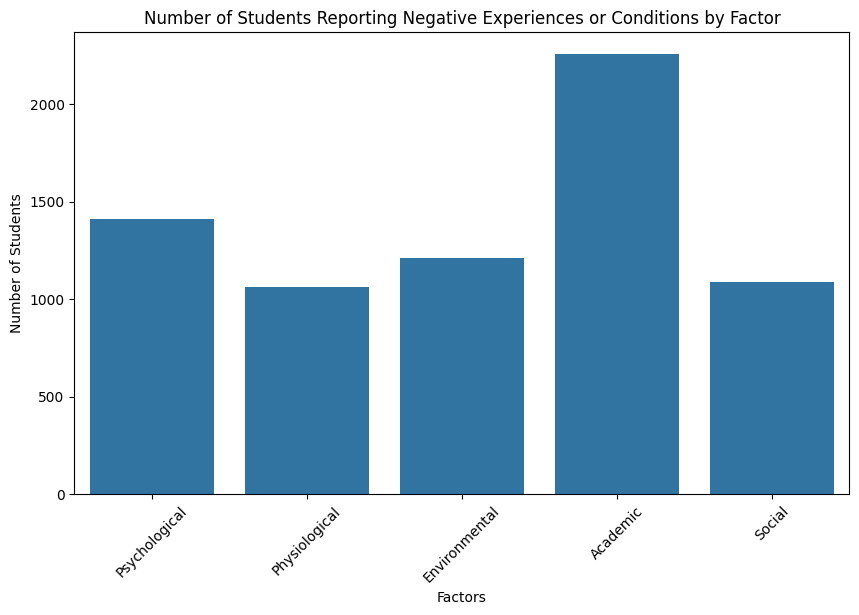

In [ ]:
# Define the relevant columns
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Calculate the number of students with negative experiences or conditions for each factor
num_students_with_negative_psychological = df[psychological_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_physiological = df[physiological_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_environmental = df[environmental_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_academic = df[academic_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_social = df[social_factors].apply(lambda x: x.gt(3).sum(), axis=1)

# Create a bar chart for the number of students with various negative experiences or conditions
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [
    num_students_with_negative_psychological.sum(),
    num_students_with_negative_physiological.sum(),
    num_students_with_negative_environmental.sum(),
    num_students_with_negative_academic.sum(),
    num_students_with_negative_social.sum()
]

plt.figure(figsize=(10, 6))
sns.barplot(x=factors, y=negative_experiences)
plt.title("Number of Students Reporting Negative Experiences or Conditions by Factor")
plt.xlabel("Factors")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

# Psychological Factors

- 1) How many students have a self-esteem level below the average?
- 2) What percentage of students have reported experiencing depression?

In [ ]:
# 1
average_self_esteem = df['self_esteem'].mean()
students_below_average_self_esteem = df[df['self_esteem'] < average_self_esteem]
num_students_below_average_self_esteem = len(students_below_average_self_esteem)


# 2
percentage_students_experiencing_depression = (df['depression'].sum() / num_students) * 100

print("1) Number of students with self-esteem below the average:", num_students_below_average_self_esteem)
print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

1) Number of students with self-esteem below the average: 507
2) Percentage of students experiencing depression: 1255.55%


# NOTE

- in order to have the percentage of students experience depression in a logical scale which is more understandable, we can set a threshold and create a new binary column

In [ ]:
# Define the threshold and create the new binary column
threshold = 10
df['depression_binary'] = (df['depression'] > threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)


percentage_students_experiencing_depression = (df['depression_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

2) Percentage of students experiencing depression: 56.36%


# Physiological Factors

- 1) How many students experience headaches frequently?
- 2) What is the average blood pressure reading among the students?
- 3) How many students rate their sleep quality as poor?

In [ ]:
# 1
students_with_frequent_headaches = df[df['headache'] == 1]
num_students_with_frequent_headaches = len(students_with_frequent_headaches)

# 2
average_blood_pressure = df['blood_pressure'].mean()

# 3
students_with_poor_sleep_quality = df[df['sleep_quality'] < 3]
num_students_with_poor_sleep_quality = len(students_with_poor_sleep_quality)

print("1) Number of students experiencing frequent headaches:", num_students_with_frequent_headaches)
print("2) Average blood pressure reading among the students:", average_blood_pressure)
print("3) Number of students with poor sleep quality:", num_students_with_poor_sleep_quality)

1) Number of students experiencing frequent headaches: 331
2) Average blood pressure reading among the students: 2.1818181818181817
3) Number of students with poor sleep quality: 550


# Environmental Factors

- 1) How many students live in conditions with high noise levels?
- 2) What percentage of students feel unsafe in their living conditions?
- 3) How many students have reported not having their basic needs met?

In [ ]:
# 1
students_in_high_noise_conditions = df[df['noise_level'] > 3]
num_students_in_high_noise_conditions = len(students_in_high_noise_conditions)

# 2
percentage_students_feeling_unsafe = (df['safety'].sum() / num_students) * 100

# 3
students_without_basic_needs = df[df['basic_needs'] == 0]
num_students_without_basic_needs = len(students_without_basic_needs)

print("1) Number of students living in high noise conditions:", num_students_in_high_noise_conditions)
print("2) Percentage of students feeling unsafe in their living conditions:", percentage_students_feeling_unsafe)
print("3) Number of students without their basic needs met:", num_students_without_basic_needs)

1) Number of students living in high noise conditions: 274
2) Percentage of students feeling unsafe in their living conditions: 273.72727272727275
3) Number of students without their basic needs met: 40


# NOTE

- in order to have the Percentage of students feeling unsafe in their living conditions in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [ ]:
# Create a binary column for safety (1 indicates feeling unsafe, 0 indicates feeling safe)
threshold_for_safety = 2
df['feeling_unsafe'] = (df['safety'] <= threshold_for_safety).astype(int)


percentage_students_feeling_unsafe = (df['feeling_unsafe'].sum() / num_students) * 100

print(f"2) Percentage of students feeling unsafe in their living conditions: {percentage_students_feeling_unsafe:.2f}%")

2) Percentage of students feeling unsafe in their living conditions: 51.36%


# Academic Factors

- 1) How many students rate their academic performance as below average?
- 2) What is the average study load reported by students?
- 3) How many students have concerns about their future careers?

In [ ]:
# 1
students_below_average_academic_performance = df[df['academic_performance'] < 3]
num_students_below_average_academic_performance = len(students_below_average_academic_performance)

# 2
average_study_load = df['study_load'].mean()

# 3
students_with_future_career_concerns = df[df['future_career_concerns'] == 1]
num_students_with_future_career_concerns = len(students_with_future_career_concerns)

print("1) Number of students with below-average academic performance:", num_students_below_average_academic_performance)
print("2) Average study load reported by students:", average_study_load)
print("3) Number of students with concerns about their future careers:", num_students_with_future_career_concerns)

1) Number of students with below-average academic performance: 561
2) Average study load reported by students: 2.6218181818181816
3) Number of students with concerns about their future careers: 327


# Social Factors

- 1) How many students feel they have strong social support?
- 2) What percentage of students have experienced bullying?
- 3) How many students participate in extracurricular activities?

In [ ]:
# 1
students_with_strong_social_support = df[df['social_support'] > 3]
num_students_with_strong_social_support = len(students_with_strong_social_support)

# 2
percentage_students_experiencing_bullying = (df['bullying'].sum() / num_students) * 100

# 3
students_participating_in_extracurricular = df[df['extracurricular_activities'] == 1]
num_students_participating_in_extracurricular = len(students_participating_in_extracurricular)

print("1) Number of students with strong social support:", num_students_with_strong_social_support)
print("2) Percentage of students experiencing bullying:", percentage_students_experiencing_bullying)
print("3) Number of students participating in extracurricular activities:", num_students_participating_in_extracurricular)

1) Number of students with strong social support: 0
2) Percentage of students experiencing bullying: 261.72727272727275
3) Number of students participating in extracurricular activities: 184


# NOTE

- in order to have the Percentage of students experiencing bullying in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [ ]:
# Define the threshold and create the new binary column for bullying
bullying_threshold = 3
df['bullying_binary'] = (df['bullying'] > bullying_threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)

# Compute the percentage using the new binary column
percentage_students_experiencing_bullying = (df['bullying_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing bullying: {percentage_students_experiencing_bullying:.2f}%")

2) Percentage of students experiencing bullying: 32.73%


# Comparative Analysis

- 1) Is there a correlation between anxiety level and academic performance?
- 2) Do students with poor sleep quality also report higher levels of depression?
- 3) Are students who experience bullying more likely to have a history of mental health issues?

In [ ]:
# 1
correlation_anxiety_academic = df['anxiety_level'].corr(df['academic_performance'])

# 2
correlation_sleep_depression = df['sleep_quality'].corr(df['depression'])

# 3
students_with_bullying_history = df[df['bullying'] == 1]
students_with_bullying_history_and_mental_health_history = students_with_bullying_history[
    students_with_bullying_history['mental_health_history'] == 1]
percentage_students_with_bullying_and_mental_health_history = (
    len(students_with_bullying_history_and_mental_health_history) / len(students_with_bullying_history)) * 100

print("1) Correlation between anxiety level and academic performance:", correlation_anxiety_academic)
print("2) Correlation between sleep quality and depression:", correlation_sleep_depression)
print("3) Percentage of students with bullying history and mental health history:", percentage_students_with_bullying_and_mental_health_history)

1) Correlation between anxiety level and academic performance: -0.6496011296145091
2) Correlation between sleep quality and depression: -0.6931609071393333
3) Percentage of students with bullying history and mental health history: 4.179104477611941


# General Exploration

- 1) Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?
- 2) Are there any noticeable trends or patterns when comparing different factors?
- 3) Which specific feature within each factor has the most significant impact on student stress, based on the dataset?

In [ ]:
# 1

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [num_students_below_average_self_esteem,
                        num_students_with_frequent_headaches,
                        num_students_in_high_noise_conditions,
                        num_students_without_basic_needs,
                        len(students_with_bullying_history)]
factor_with_most_negatives = factors[negative_experiences.index(max(negative_experiences))]

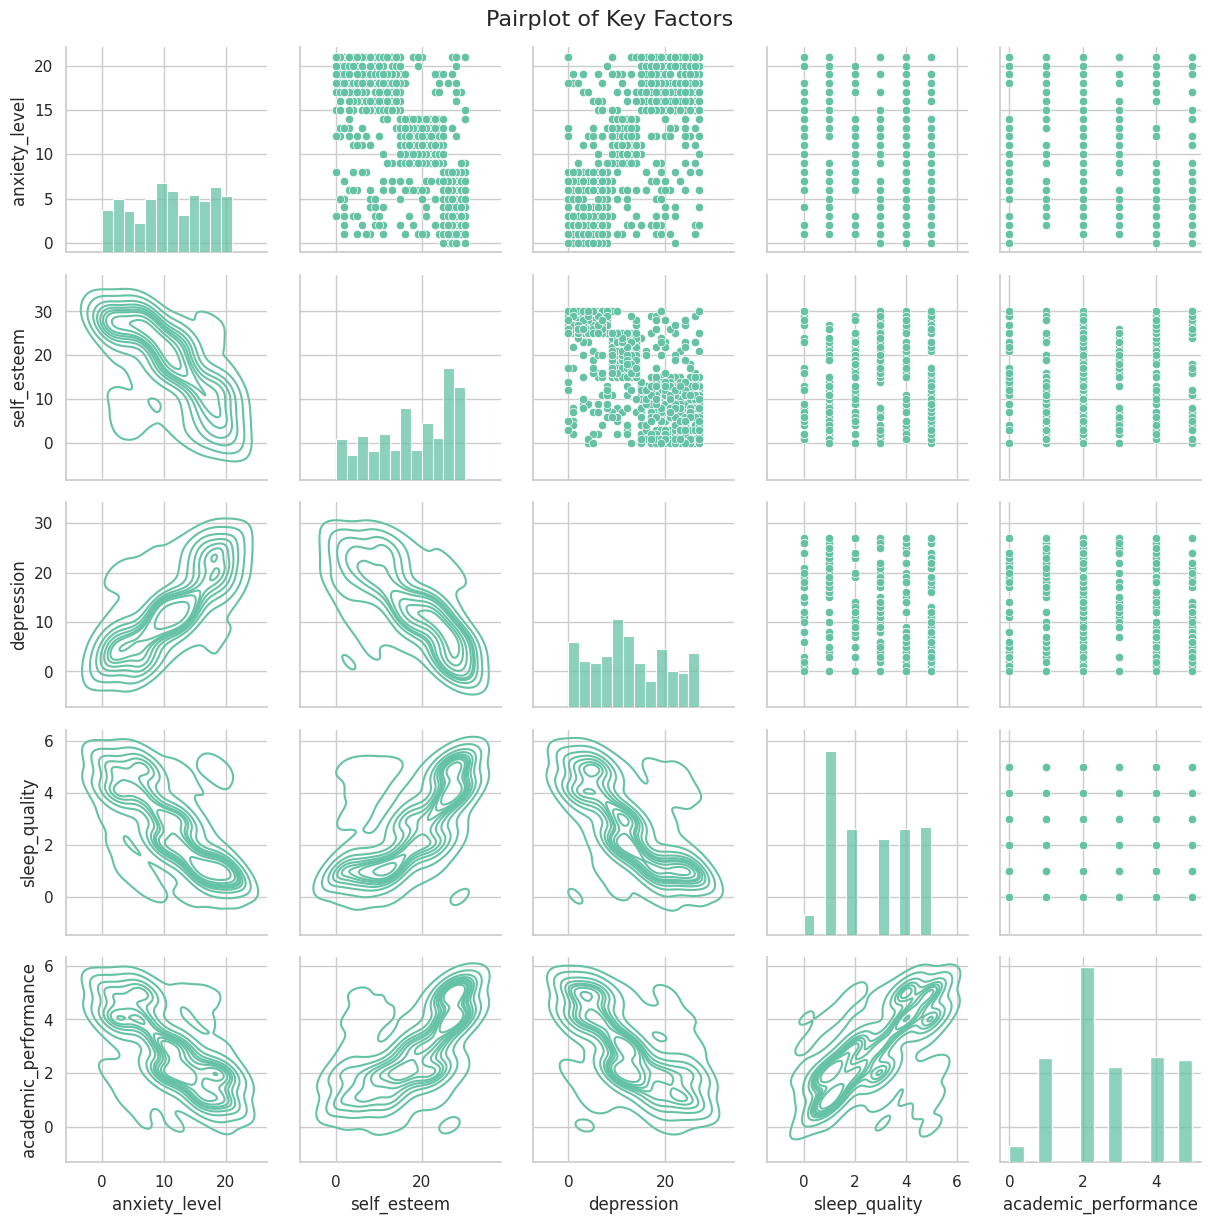

Factor: Psychological
- Feature: anxiety_level, Importance: 0.23107326114094642
- Feature: self_esteem, Importance: 0.5590228412121426
- Feature: mental_health_history, Importance: 0.021804357210864288
- Feature: depression, Importance: 0.18809954043604676

Factor: Physiological
- Feature: headache, Importance: 0.38047663935188863
- Feature: blood_pressure, Importance: 0.05150374464431216
- Feature: sleep_quality, Importance: 0.49723641960257814
- Feature: breathing_problem, Importance: 0.07078319640122116

Factor: Environmental
- Feature: noise_level, Importance: 0.15893328351641683
- Feature: living_conditions, Importance: 0.12101571381449087
- Feature: safety, Importance: 0.3335421264933875
- Feature: basic_needs, Importance: 0.38650887617570473

Factor: Academic
- Feature: academic_performance, Importance: 0.39944736549157334
- Feature: study_load, Importance: 0.10157877206371538
- Feature: teacher_student_relationship, Importance: 0.2556989513928694
- Feature: future_career_concer

In [ ]:
# 2&3

# Set a custom style for the plot
sns.set(style="whitegrid", palette="Set2")


factors_to_plot = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']]

g = sns.PairGrid(factors_to_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.histplot, kde_kws={'color': 'C0'})


plt.subplots_adjust(top=0.95)
g.fig.suptitle("Pairplot of Key Factors", size=16)

# Show the plot
plt.show()



# use perform feature importance analysis To determine which specific feature within each factor has the most significant impact.

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Define factors
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

# Define feature sets for each factor

psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Initialize a Random Forest Regressor
model = RandomForestRegressor()


feature_importance = {}

# Loop through each factor and analyze feature importance

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = df[features]
    y = df['stress_level']

    model.fit(X, y)

    # Get feature importances
    importance = model.feature_importances_


    # Store feature importances in the dictionary

    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}


    # Print the feature importance for each factor

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

# Correlation Heatmap of Key Factors

- create a heatmap to visualize correlations between key factors. This helps you identify strong positive or negative relationships

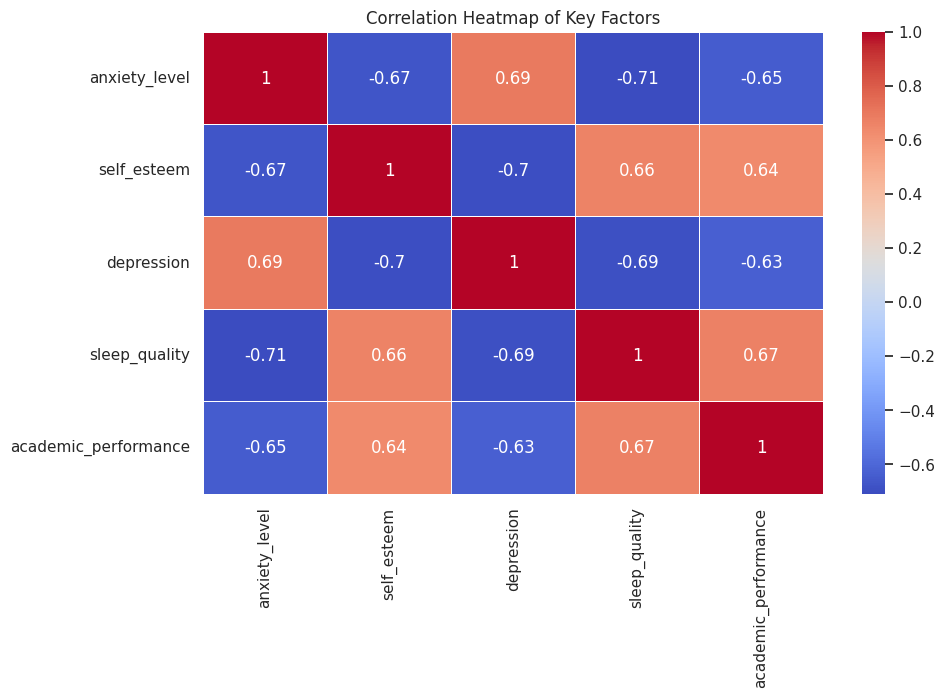

In [ ]:
correlation_matrix = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Key Factors")
plt.show()

# Box Plots

- use box plots to identify trends and variations in factors. This is useful for comparing distributions

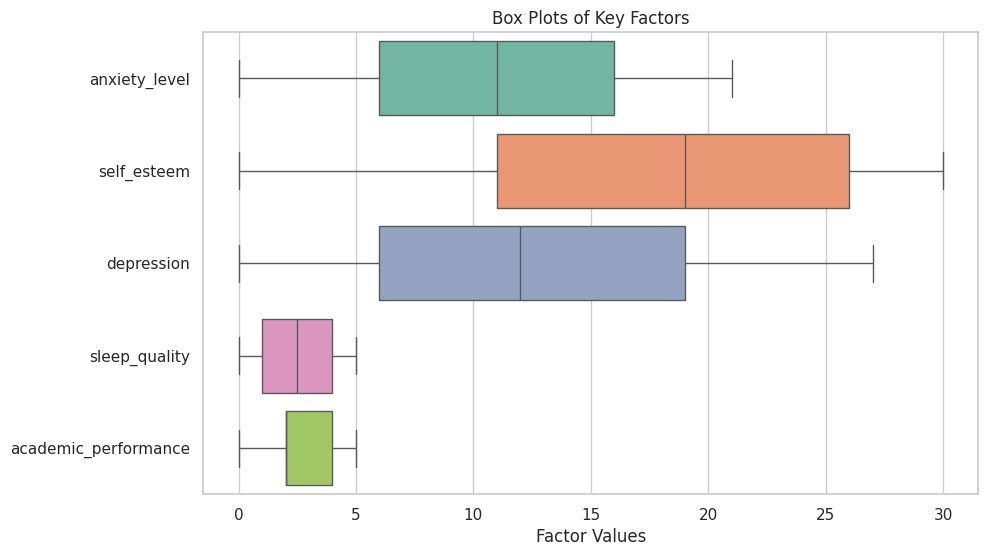

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']], orient='h')
plt.title("Box Plots of Key Factors")
plt.xlabel("Factor Values")
plt.show()

# Determining Specific Feature Impact

- To visualize feature importance within each factor, create bar charts for each factor's features.

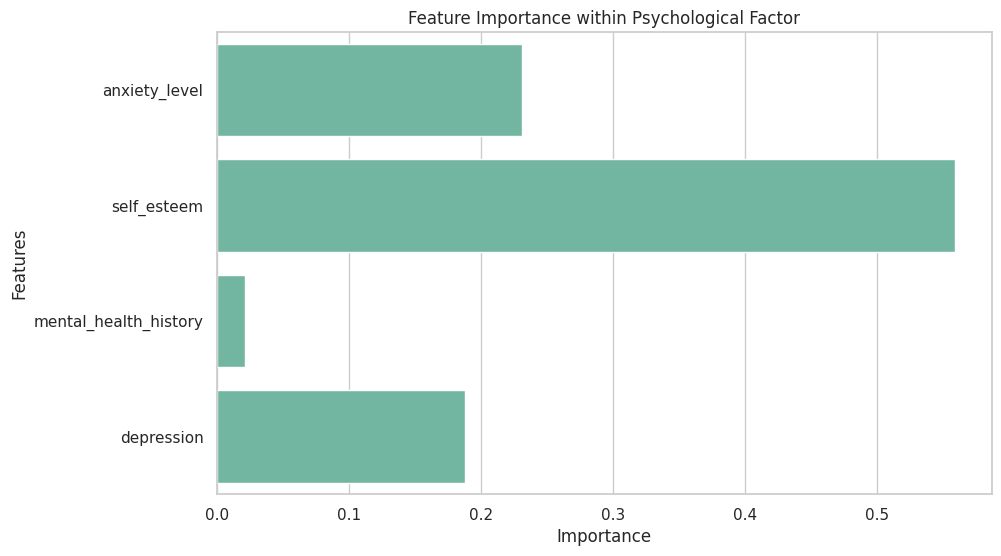

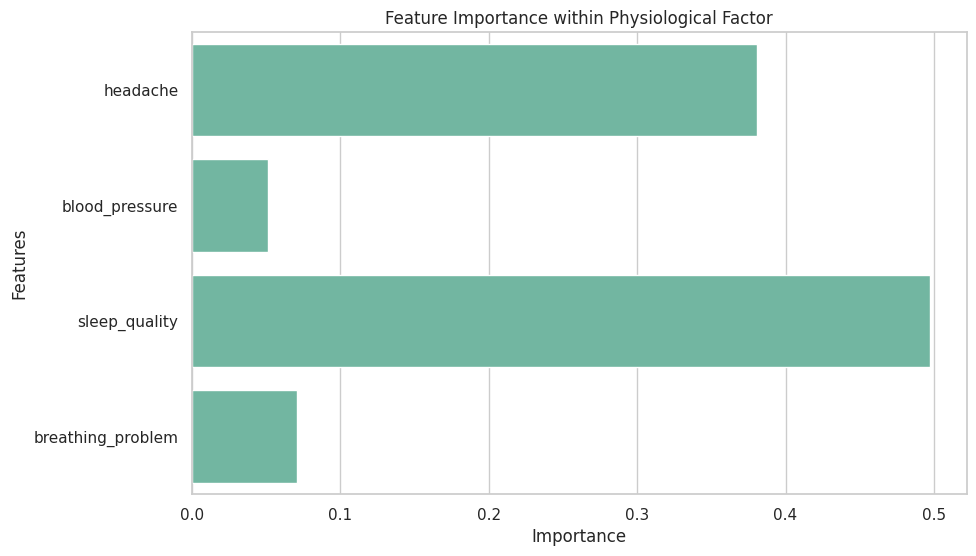

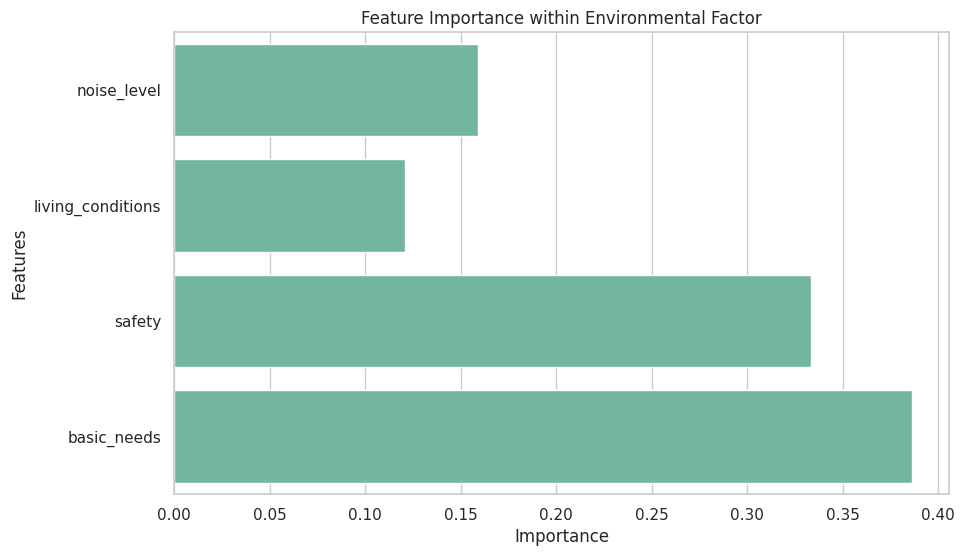

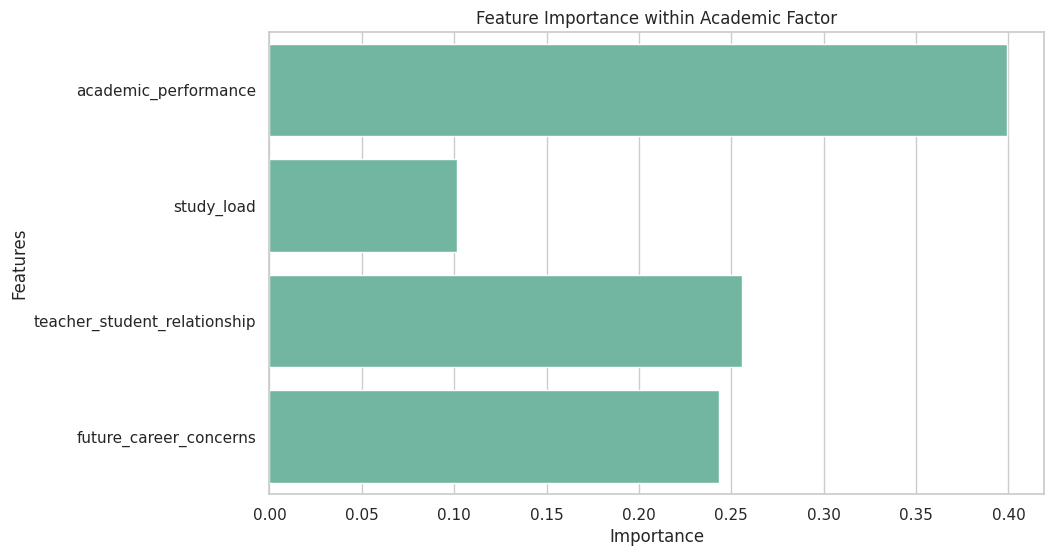

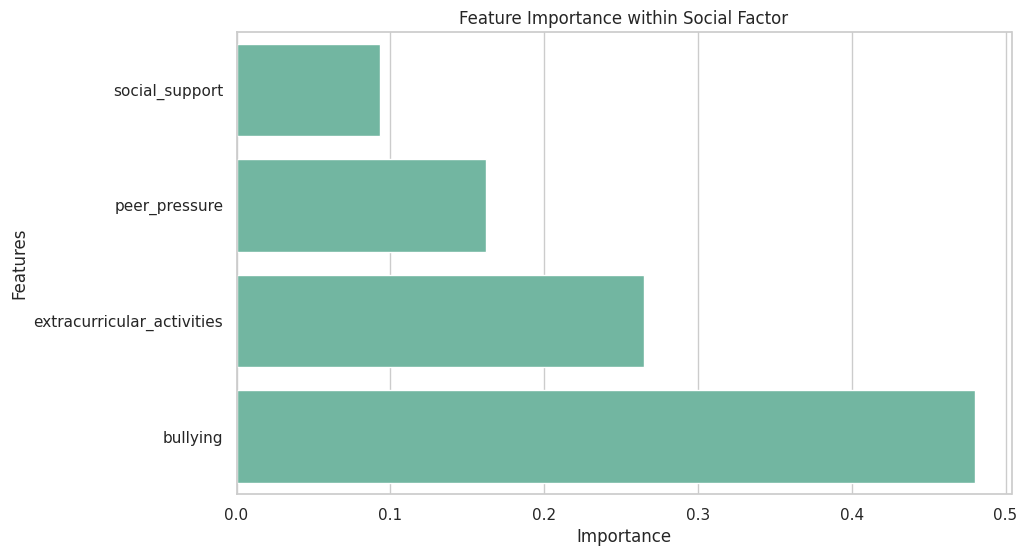

In [ ]:
# Define feature importance for each factor

psychological_feature_importance = feature_importance['Psychological']
physiological_feature_importance = feature_importance['Physiological']
environmental_feature_importance = feature_importance['Environmental']
academic_feature_importance = feature_importance['Academic']
social_feature_importance = feature_importance['Social']



# Create bar charts for feature importance within each factor

def plot_feature_importance(factor_name, importance_dict):
    features = list(importance_dict.keys())
    importance = list(importance_dict.values())
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=features, orient='h')
    plt.title(f"Feature Importance within {factor_name} Factor")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance('Psychological', psychological_feature_importance)
plot_feature_importance('Physiological', physiological_feature_importance)
plot_feature_importance('Environmental', environmental_feature_importance)
plot_feature_importance('Academic', academic_feature_importance)
plot_feature_importance('Social', social_feature_importance)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame containing the stress level dataset
# Select features and target variable
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8681818181818182


In [ ]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,depression_binary,feeling_unsafe,bullying_binary
0,14,20,0,11,2,1,2,4,2,3,...,3,3,2,3,3,2,1,1,0,0
1,15,8,1,15,5,3,1,4,3,1,...,1,5,1,4,5,5,2,1,1,1
2,12,18,1,14,2,1,2,2,2,2,...,3,2,2,3,2,2,1,1,0,0
3,16,12,1,15,4,3,1,3,4,2,...,1,4,1,4,4,5,2,1,1,1
4,16,28,0,7,2,3,5,1,3,2,...,1,2,1,5,0,5,1,0,0,1


In [ ]:
# missing values
df.isnull().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


In [ ]:
#Seperating the x and the y variables and converting them to numpy array
X=df.drop(columns=["academic_performance","stress_level"])
y=df['academic_performance']
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
# # SPLIT DATA INTO TRAIN & TEST
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

In [ ]:
# TRAIN MULTIPLE MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Support Vector Machine": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.882
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        76
           1       0.86      0.88      0.87        73
           2       0.91      0.90      0.91        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220


Support Vector Machine Accuracy: 0.895
              precision    recall  f1-score   support

           0       0.93      0.88      0.91        76
           1       0.90      0.89      0.90        73
           2       0.86      0.92      0.88        71

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220


Random Forest Accuracy: 0.877
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        76
           1       0.

/tmp/ipython-input-3307257626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


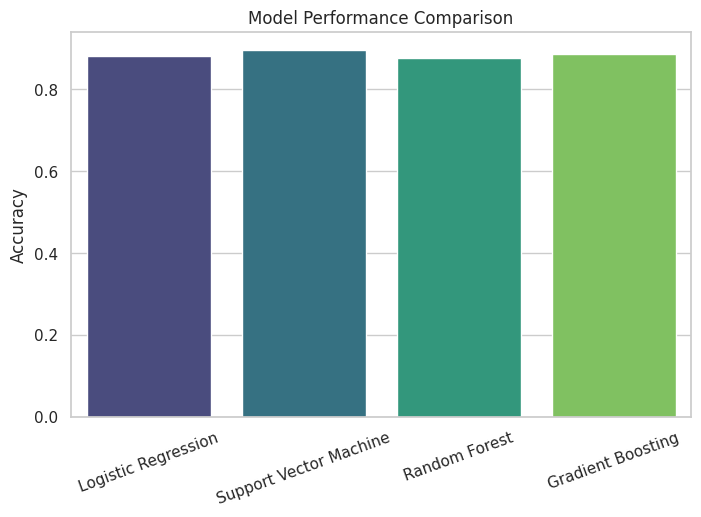

In [ ]:
# COMPARE MODEL PERFORMANCE

plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()


/tmp/ipython-input-3262472580.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="mako")


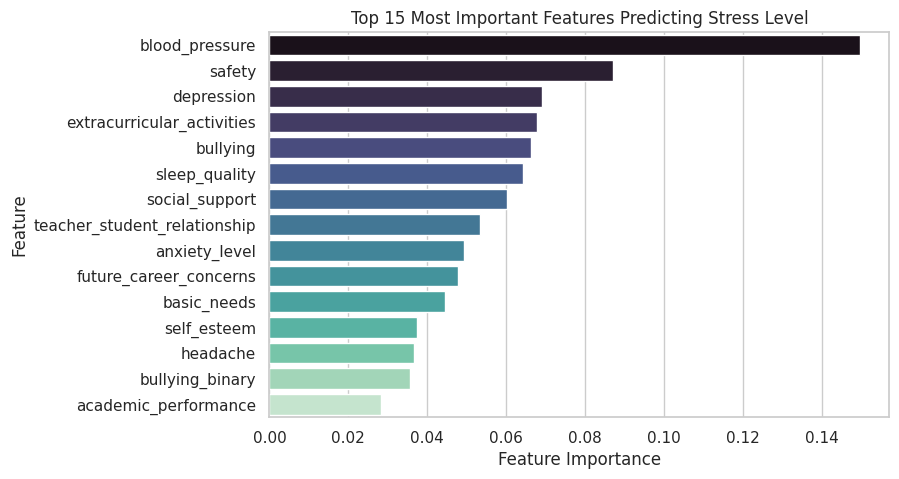

In [ ]:
# FEATURE IMPORTANCE (Random Forest)
# =============================================
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_

# Get feature names from the original DataFrame before converting to numpy array
feature_names = df.drop('stress_level', axis=1).columns

indices = np.argsort(importances)[::-1][:15]  # top 15 features

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="mako")
plt.title("Top 15 Most Important Features Predicting Stress Level")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# # Create a heatmap of the confusion matrix
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        76
           1       0.93      0.86      0.89        73
           2       0.89      0.87      0.88        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



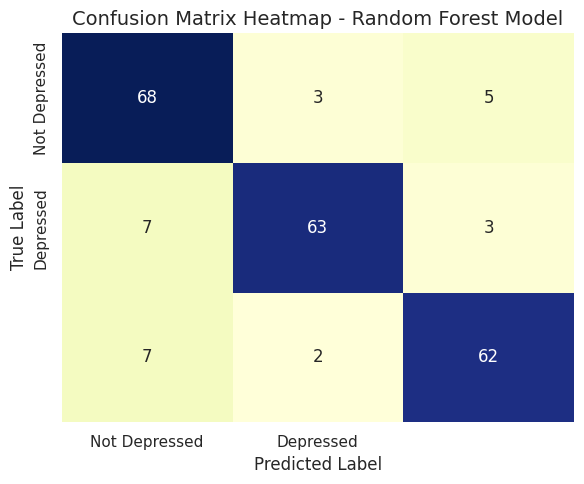

In [ ]:
# =============================================
# CONFUSION MATRIX HEATMAP (Random Forest)
# =============================================
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Optional: print detailed metrics
print("Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("Confusion Matrix Heatmap - Random Forest Model", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save model and preprocessing tools
joblib.dump(rf_model, "rf_depression_model.pkl")
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")
# joblib.dump(label_encoders, "label_encoders.pkl")

print("✅ Random Forest model and preprocessors saved successfully.")

✅ Random Forest model and preprocessors saved successfully.


In [ ]:
# import joblib
# import pandas as pd

# # Load saved model
# rf_model = joblib.load("rf_depression_model.pkl")

# # Example new teenage data (adjust values as needed)
# new_teen = pd.DataFrame({
#     'anxiety_level': [3],
#     'self_esteem': [2],
#     'mental_health_history': [1],
#     'headache': [0],
#     'blood_pressure': [1],
#     'sleep_quality': [2],
#     'breathing_problem': [0],
#     'noise_level': [1],
#     'living_conditions': [2],
#     'teacher_student_relationship': [1],
#     'future_career_concerns': [2],
#     'social_support': [2],
#     'peer_pressure': [3],
#     'extracurricular_activities': [1],
#     'bullying': [0],
#     'stress_level': [1],
#     'depression_binary': [0],
#     'feeling_unsafe': [1],
#     'bullying_binary': [0]
# })

# # Predict depression level
# prediction = rf_model.predict(new_teen)
# print(f"🎯 Predicted Depression Level: {prediction[0]}")


In [ ]:
! pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.9 MB/s eta 0:00:00


In [ ]:
# import streamlit as st
# import pandas as pd
# import joblib

# # Load trained Random Forest model
# rf_model = joblib.load("rf_depression_model.pkl")

# # Streamlit page setup
# st.set_page_config(page_title="Teen Depression Predictor", page_icon="🧠", layout="centered")

# st.title("🧠 Teen Depression Risk Predictor")
# st.markdown("""
# This tool uses a trained **Random Forest model** to estimate depression risk among teenagers
# based on their behavioral, academic, and environmental factors.
# """)

# # Sidebar inputs
# st.sidebar.header("Enter Teen's Information")

# anxiety_level = st.sidebar.slider("Anxiety Level (0–3)", 0, 3, 1)
# self_esteem = st.sidebar.slider("Self Esteem (0–3)", 0, 3, 2)
# mental_health_history = st.sidebar.selectbox("Mental Health History (0=No, 1=Yes)", [0, 1])
# sleep_quality = st.sidebar.slider("Sleep Quality (0–3)", 0, 3, 2)
# academic_performance = st.sidebar.slider("Academic Performance (0–3)", 0, 3, 2)
# social_support = st.sidebar.slider("Social Support (0–3)", 0, 3, 2)
# peer_pressure = st.sidebar.slider("Peer Pressure (0–3)", 0, 3, 1)
# bullying = st.sidebar.selectbox("Experienced Bullying (0=No, 1=Yes)", [0, 1])
# future_career_concerns = st.sidebar.slider("Future Career Concerns (0–3)", 0, 3, 1)
# feeling_unsafe = st.sidebar.selectbox("Feeling Unsafe (0=No, 1=Yes)", [0, 1])

# if st.button("Predict Depression Risk"):
#     # Create input dataframe
#     input_data = pd.DataFrame({
#         'anxiety_level': [anxiety_level],
#         'self_esteem': [self_esteem],
#         'mental_health_history': [mental_health_history],
#         'headache': [0],
#         'blood_pressure': [0],
#         'sleep_quality': [sleep_quality],
#         'breathing_problem': [0],
#         'noise_level': [0],
#         'living_conditions': [0],
#         'teacher_student_relationship': [0],
#         'future_career_concerns': [future_career_concerns],
#         'social_support': [social_support],
#         'peer_pressure': [peer_pressure],
#         'extracurricular_activities': [0],
#         'bullying': [bullying],
#         'stress_level': [0],
#         'depression_binary': [0],
#         'feeling_unsafe': [feeling_unsafe],
#         'bullying_binary': [0]
#     })

#     # Predict
#     prediction = rf_model.predict(input_data)[0]

#     st.subheader("🧩 Prediction Result")
#     if prediction == 0:
#         st.success("Low Risk of Depression 🟢")
#     elif prediction == 1:
#         st.warning("Moderate Risk of Depression 🟡")
#     else:
#         st.error("High Risk of Depression 🔴")

#     st.markdown("""
#     ---
#     **Note:** This model is for educational and research use only.
#     It does not replace professional diagnosis or counseling.
#     """)


In [ ]:
import streamlit as st
import pandas as pd
import joblib

# ==============================
# LOAD MODEL & FEATURE NAMES
# ==============================
@st.cache_resource
def load_model_and_features():
    model = joblib.load("rf_depression_model.pkl")
    feature_names = joblib.load("feature_names.pkl")
    return model, feature_names

rf_model, feature_names = load_model_and_features()

# ==============================
# PAGE SETUP
# ==============================
st.set_page_config(page_title="Teen Depression Predictor", page_icon="🧠", layout="centered")

st.title("🧠 Teen Depression Risk Predictor")
st.markdown("""
This app uses a trained **Random Forest model** to predict depression risk among teenagers
based on behavioral, academic, and environmental factors.
""")

# ==============================
# INPUT FORM
# ==============================
with st.form("depression_form"):
    st.subheader("Enter Teen’s Details")

    col1, col2 = st.columns(2)
    with col1:
        anxiety_level = st.slider("Anxiety Level (0–3)", 0, 3, 1)
        self_esteem = st.slider("Self Esteem (0–3)", 0, 3, 2)
        mental_health_history = st.selectbox("Mental Health History (0=No, 1=Yes)", [0, 1])
        sleep_quality = st.slider("Sleep Quality (0–3)", 0, 3, 2)
        academic_performance = st.slider("Academic Performance (0–3)", 0, 3, 2)
        study_load = st.slider("Study Load (0–3)", 0, 3, 2)
        social_support = st.slider("Social Support (0–3)", 0, 3, 2)

    with col2:
        peer_pressure = st.slider("Peer Pressure (0–3)", 0, 3, 1)
        bullying = st.selectbox("Experienced Bullying (0=No, 1=Yes)", [0, 1])
        basic_needs = st.slider("Basic Needs Met (0–3)", 0, 3, 2)
        safety = st.selectbox("Feeling Safe (0=No, 1=Yes)", [0, 1])
        future_career_concerns = st.slider("Future Career Concerns (0–3)", 0, 3, 1)
        extracurricular_activities = st.slider("Extracurricular Activities (0–3)", 0, 3, 2)
        teacher_student_relationship = st.slider("Teacher-Student Relationship (0–3)", 0, 3, 2)

    submitted = st.form_submit_button("Predict Depression Risk")

# ==============================
# PREDICTION LOGIC
# ==============================
if submitted:
    # Create DataFrame from inputs
    input_data = pd.DataFrame({
        'anxiety_level': [anxiety_level],
        'self_esteem': [self_esteem],
        'mental_health_history': [mental_health_history],
        'headache': [0],
        'blood_pressure': [0],
        'sleep_quality': [sleep_quality],
        'breathing_problem': [0],
        'noise_level': [0],
        'living_conditions': [0],
        'academic_performance': [academic_performance],
        'study_load': [study_load],
        'teacher_student_relationship': [teacher_student_relationship],
        'future_career_concerns': [future_career_concerns],
        'social_support': [social_support],
        'peer_pressure': [peer_pressure],
        'extracurricular_activities': [extracurricular_activities],
        'bullying': [bullying],
        'basic_needs': [basic_needs],
        'safety': [safety],
        'stress_level': [0],
        'depression_binary': [0],
        'feeling_unsafe': [0],
        'bullying_binary': [0]
    })

    # Reindex input_data to match training features
    input_data = input_data.reindex(columns=feature_names, fill_value=0)

    # Predict
    pred = rf_model.predict(input_data)[0]

    # Display Results
    st.markdown("---")
    st.subheader("🧩 Prediction Result")
    if pred == 0:
        st.success("Low Risk of Depression 🟢")
    elif pred == 1:
        st.warning("Moderate Risk of Depression 🟡")
    else:
        st.error("High Risk of Depression 🔴")

    st.markdown("""
    ---
    ⚠️ *Disclaimer:* This tool is for educational and research purposes only.
    It should not replace professional medical advice or psychological assessment.
    """)


2025-10-14 08:15:42.247 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-14 08:15:42.554 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-14 08:15:42.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-14 08:15:42.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-14 08:15:42.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-14 08:15:42.611 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-14 08:15:42.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-14 08:15:42.613 Thread 'MainThread': mi

In [ ]:
%%writefile app.py

Writing app.py


In [ ]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
added 22 packages in 5s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹

In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.12.178.194


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.12.178.194:8501

⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://kind-emus-leave.loca.lt


In [ ]:
# THE END :)